In [1]:
! pip install tensorflow

In [3]:
import tensorflow as tf
# from tensorflow.keras import models , layers
#import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras import models , layers

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=16
CHANNELS=3

In [7]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

135

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):

  ds_size =len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)


  return train_ds ,val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [14]:
len(train_ds)

108

In [15]:
len(val_ds)

13

In [16]:
len(test_ds)

14

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [20]:
data_augmentation = tf.keras.Sequential([
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2),
])

Building the model


In [ ]:
# input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# n_classes=3
# model1=models.Sequential([
#     resize_and_rescale,
#     data_augmentation,

#     layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
#     layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(128,(3,3),activation='relu'),
#     layers.Conv2D(128,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(256,(3,3),activation='relu'),
#     layers.Conv2D(256,(3,3),activation='relu'),
#     layers.Conv2D(256,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(512,(3,3),activation='relu'),
#     layers.Conv2D(512,(3,3),activation='relu'),
#     layers.Conv2D(512,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(512,(3,3),activation='relu'),
#     layers.Conv2D(512,(3,3),activation='relu'),
#     layers.Conv2D(512,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),


#     layers.Flatten(),
#     layers.Dense(64,activation='relu'),
#     layers.Dense(64,activation='relu'),
#     layers.Dense(n_classes,activation='softmax')
# ])
# model1.build(input_shape=input_shape)

In [21]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3
model1=models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),


    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),


    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),


    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model1.build(input_shape=input_shape)

c:\Users\rekha\OneDrive\Desktop\Plant Disease Detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model1.summary

<bound method Model.summary of <Sequential name=sequential_2, built=True>>

In [23]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
checkpoint = ModelCheckpoint('./checkpoints.keras',
    verbose=1,
    monitor='val_accuracy',
    save_best_only=True,
    mode='auto'
)

In [27]:
EPOCHS=10
history=model1.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10


108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5001 - loss: 0.9400
Epoch 1: val_accuracy improved from -inf to 0.55288, saving model to ./checkpoints.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.5004 - loss: 0.9396 - val_accuracy: 0.5529 - val_loss: 0.7318
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6515 - loss: 0.7425
Epoch 2: val_accuracy improved from 0.55288 to 0.82692, saving model to ./checkpoints.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6522 - loss: 0.7413 - val_accuracy: 0.8269 - val_loss: 0.3821
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8348 - loss: 0.3642
Epoch 3: val_accuracy improved from 0.82692 to 0.85096, saving model to ./checkpoints.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.8350 - loss: 0.3639 - val_accuracy: 0.8510 - val_loss: 0.3829
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8687 - loss: 0.3286
Epoch 4: val_accuracy improved from 0.85096 

In [28]:
scores=model1.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.9535 - loss: 0.1299


In [29]:
scores

[0.12706084549427032, 0.9553571343421936]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 108}

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
history.history['accuracy']

[0.5302325487136841,
 0.7319767475128174,
 0.8581395149230957,
 0.8813953399658203,
 0.9098837375640869,
 0.9226744174957275,
 0.9267441630363464,
 0.9273256063461304,
 0.9412790536880493,
 0.9325581192970276]

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [35]:
val_acc

[0.5528846383094788,
 0.8269230723381042,
 0.8509615659713745,
 0.9182692170143127,
 0.9278846383094788,
 0.9375,
 0.9230769276618958,
 0.9134615659713745,
 0.9567307829856873,
 0.9663461446762085]

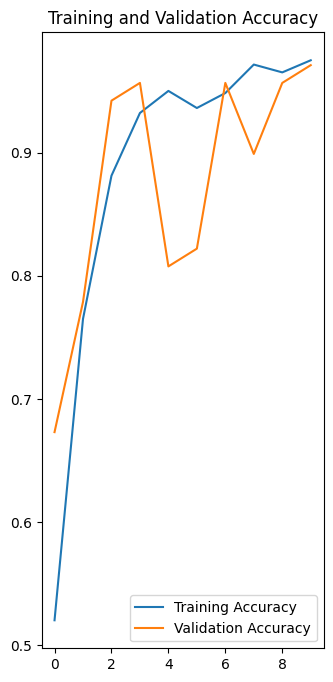

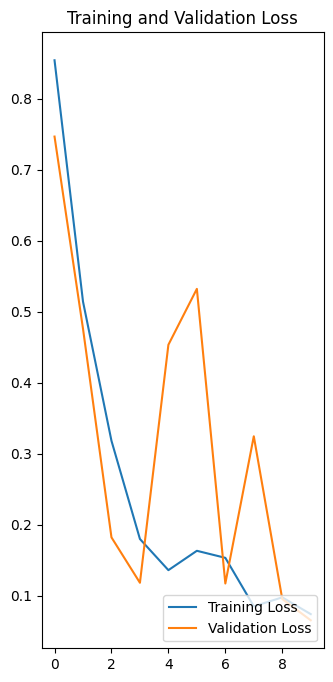

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()


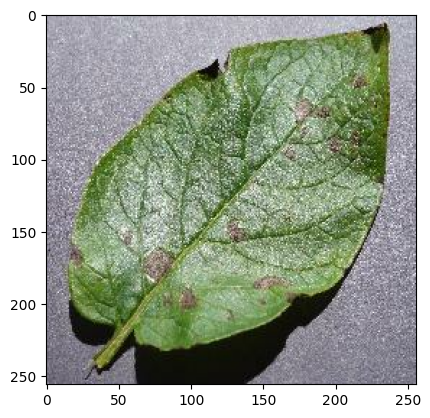

In [ ]:
for images_batch,label_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))

In [ ]:
for images_batch,label_batch in test_ds.take(1):
  print(images_batch[0].numpy().astype('uint8'))

[[[180 172 183]
  [183 175 186]
  [183 175 186]
  ...
  [134 118 128]
  [137 121 131]
  [124 108 118]]

 [[177 169 180]
  [182 174 185]
  [183 175 186]
  ...
  [ 86  70  80]
  [ 94  78  88]
  [117 101 111]]

 [[177 169 180]
  [183 175 186]
  [185 177 188]
  ...
  [145 129 139]
  [113  97 107]
  [155 139 149]]

 ...

 [[170 157 164]
  [176 163 170]
  [179 166 173]
  ...
  [148 127 134]
  [134 113 120]
  [114  93 100]]

 [[168 155 162]
  [173 160 167]
  [176 163 170]
  ...
  [117  96 103]
  [121 100 107]
  [132 111 118]]

 [[176 163 170]
  [180 167 174]
  [181 168 175]
  ...
  [150 129 136]
  [123 102 109]
  [105  84  91]]]


In [45]:
import numpy as np
for images_batch,label_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print('first image to predict:')

  #print("first image's actual label:",first_label)
  print("first image's actual label:",class_names[first_label])
  batch_prediction = model1.predict(images_batch)
  print(batch_prediction[0])
  print(np.argmax(batch_prediction[0]))
  print(class_names[np.argmax(batch_prediction[0])])




first image to predict:
first image's actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[9.9974078e-01 2.5921213e-04 3.2068180e-16]
0
Potato___Early_blight


In [44]:
import numpy as np

In [38]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)# Create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)
  return predicted_class, confidence

In [48]:
image="Potato/Potato_Early_blight/1d466431-007d-4b3b-bd45-b09f1a6f7bad___RS_Early.B 8932.JPG"
predicted_class, confidence=predict(model1,image.numpy())
print(predicted_class)
print(confidence)
actual_class = class_names[labels]
print(actual_class)


AttributeError: 'str' object has no attribute 'numpy'

In [43]:

for images, labels in test_ds.take(1):
  for i in range(9):

    predicted_class, confidence=predict(model1,images[i].numpy())
    print(predicted_class)
    print(confidence)
    actual_class = class_names[labels[i]]
    print(actual_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Potato___healthy
99.68
Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Potato___healthy
79.69
Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Potato___Early_blight
100.0
Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Potato___Late_blight
97.48
Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Potato___Late_blight
100.0
Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Potato___Late_blight
99.85
Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Potato___Early_blight
99.99
Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Potato___Late_blight
99.94
Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Potato___Late_blight
99.99
Potato___Late_blight


In [47]:
model1.save('Potato_model.keras')